In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
from pylab import mpl, plt
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
%matplotlib inline

# Writing Objects to Disk Using Pickle

In [2]:
import pickle
from random import gauss
a = [gauss(1.5,2) for i in range (1000000)]
pkl_file = open('data.pkl', 'wb')

Two major functions are used to serialise and deserialise Python objects are pickle.dump() for writing objects, and pickle.load() for loading objects into memory.

In [3]:
%time
pickle.dump(a,pkl_file)

Wall time: 0 ns


In [4]:
pkl_file.close()

In [5]:
pkl_file = open('data.pkl','rb')


In [6]:
%time b = pickle.load(pkl_file)

Wall time: 268 ms


In [7]:
a[:3]

[4.246545896372005, 0.8727158376610588, -0.241654561691794]

In [8]:
b[:3]

[4.246545896372005, 0.8727158376610588, -0.241654561691794]

In [9]:
np.allclose(np.array(a), np.array(b)) # confirm that the data in the variables are the same

True

For two ndarray, the process to retrieve the information is similar to above; however, it is worth noting that pickle stores objects as first in, first out (FIFO) principle.

In [10]:
%time
pkl_file = open('data.pkl', 'wb')
pickle.dump(np.array(a),pkl_file)
pickle.dump(np.array(a)**2,pkl_file)
pkl_file.close()

Wall time: 0 ns


In [11]:
pkl_file = open('data.pkl', 'rb')
x = pickle.load(pkl_file)
y = pickle.load(pkl_file)
pkl_file.close()

In [12]:
pkl_file = open('data.pkl', 'wb')
pickle.dump({ "x": x, "y":y},pkl_file)
pkl_file.close()

In [13]:
pkl_file = open('data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 4.2465459   0.87271584 -0.24165456  0.30106414]
y [18.03315205  0.76163293  0.05839693  0.09063962]


# Reading and Writing Text Files

In [14]:
rows = 10000
a = np.random.standard_normal((rows, 5)).round(3)
a

array([[ 0.971,  0.102, -0.159, -0.04 ,  0.465],
       [ 0.197,  0.221, -0.182,  1.571,  0.362],
       [-0.028, -0.049,  0.464,  0.313,  0.393],
       ...,
       [-0.669, -0.152,  0.464, -1.316,  1.615],
       [-0.364, -0.735,  1.004, -0.849,  0.121],
       [-0.09 , -0.597,  0.842, -1.025,  0.825]])

In [15]:
t = pd.date_range(start='2020/1/1', periods=rows, freq='H')
t

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2021-02-20 06:00:00', '2021-02-20 07:00:00',
               '2021-02-20 08:00:00', '2021-02-20 09:00:00',
               '2021-02-20 10:00:00', '2021-02-20 11:00:00',
               '2021-02-20 12:00:00', '2021-02-20 13:00:00',
               '2021-02-20 14:00:00', '2021-02-20 15:00:00'],
              dtype='datetime64[ns]', length=10000, freq='H')

In [16]:
csv_file = open('data.csv','w')
header = 'date, no1, no2, no3,no4,no5\n'
csv_file.write(header)

28

In [17]:
for t_, (no1,no2,no3,no4,no5) in zip(t,a):
    s = '{},{},{},{},{}\n'.format(t_, no1,no2,no3,no4,no5)
    csv_file.write(s)
csv_file.close()  

In [18]:
csv_file = open('data.csv','r')
content = csv_file.readlines()
print(content[:5])
csv_file.close()

['date, no1, no2, no3,no4,no5\n', '2020-01-01 00:00:00,0.971,0.102,-0.159,-0.04\n', '2020-01-01 01:00:00,0.197,0.221,-0.182,1.571\n', '2020-01-01 02:00:00,-0.028,-0.049,0.464,0.313\n', '2020-01-01 03:00:00,0.251,-1.068,0.507,-0.655\n']


# Working with SQL Databases

In [19]:
import sqlite3 as sq3
con = sq3.connect('dumm_data.db')
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
con.execute(query)
con.commit()
q = con.execute
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [20]:
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12,7.3))
np.random.seed(100)
data = np.random.standard_normal((10000, 2)).round(4)

In [21]:
%%time
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?,?,?)', (now, row[0], row[1]))
con.commit()

Wall time: 439 ms


In [22]:
q('SELECT * FROM numbs').fetchmany(4)
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)

[('2021-01-15 20:02:41.064657', 1.153, -0.2524),
 ('2021-01-15 20:02:41.065657', 0.9813, 0.5142),
 ('2021-01-15 20:02:41.065657', 0.6727, -0.1044),
 ('2021-01-15 20:02:41.065657', 1.619, 1.5416)]

In [23]:
pointer = q('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())

('2021-01-15 20:02:40.896276', 0.12, 7.3)
('2021-01-15 20:02:41.064657', -1.7498, 0.3427)
('2021-01-15 20:02:41.064657', 1.153, -0.2524)


In [24]:
rows = pointer.fetchall()
rows[:3]

[('2021-01-15 20:02:41.065657', 0.9813, 0.5142),
 ('2021-01-15 20:02:41.065657', 0.2212, -1.07),
 ('2021-01-15 20:02:41.065657', -0.1895, 0.255)]

In [37]:
filename = 'numbers'
con = sq3.Connection(filename+ '.db')
query = 'CREATE TABLE numbers (No1 real, No2 real,No3 real)'
q = con.execute
qm = con.executemany
q(query)


OperationalError: table numbers already exists

# Delete SQL table Object

In [25]:
q('DROP TABLE IF EXISTS numbs')
con.close()

# Writing and Reading Numpy Arrays

There are functions within the Numpy package that can be used to write and ready *ndarray* objects with performance in mind. 

In [29]:
dtimes = np.arange('2020-01-01 12:00:00', '2025-12-31 21:00:00', dtype='datetime64[m]')
len(dtimes)
dty = np.dtype([('Date','datetime64[m]'),('No1','f'), ('No2','f')])
data = np.zeros(len(dtimes), dtype=dty)
data['Date'] = dtimes
a = np.random.standard_normal((len(dtimes),2)).round(4)
data['No1'] = a[:, 0]
data['No2'] = a[:,1]

In [30]:
%time
np.save('array',data)

Wall time: 0 ns


In [31]:
%time
np.load('array.npy')

Wall time: 0 ns


array([('2020-01-01T12:00',  1.5131,  0.6973),
       ('2020-01-01T12:01', -1.722 , -0.4815),
       ('2020-01-01T12:02',  0.8251,  0.3019), ...,
       ('2025-12-31T20:57', -1.2975,  0.8387),
       ('2025-12-31T20:58', -0.486 ,  0.2146),
       ('2025-12-31T20:59', -1.2443,  0.9565)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

# Writing and Reading with pandas

In [38]:
%time
data = pd.read_sql('SELECT * FROM numbers', con)
# Data is now in memory, so it ensures faster analytics.

Wall time: 0 ns


Use the HDF5 databse file for writing, in pandas an HDFStore object is create

In [45]:
%time
h5s = pd.HDFStore('numbers.h5s', 'w')
h5s['data'] = data
h5s.close()

Wall time: 0 ns


# PyTables

In [46]:
import tables as tb

In [47]:
filename ='pytab.h5'
h5 = tb.open_file(filename, 'w')
row_des = {
'Date': tb.StringCol(26, pos=1),
'No1': tb.IntCol(pos=2),
'No2': tb.IntCol(pos=3),
'No3': tb.Float64Col(pos=4),
'No4': tb.Float64Col(pos=5)
}
rows = 150000
filters = tb.Filters(complevel = 0)
tab = h5.create_table('/', 'ints_floats', 
                      row_des, title='integers and FLoats', expectedrows=rows, filters=filters)

In [48]:
type(tab)

tables.table.Table

In [50]:
pointer = tab.row
ran_int = np.random.randint(0,10000, size=(rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(4)

In [51]:
%%time
for i in range(rows):
    pointer['Date']= datetime.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append()
tab.flush()

Wall time: 746 ms


1. A pointer object is created,
2. ndarray object with the random int objects is created.
3. ndarray object with the random float objects is created.
4. Write the datetime object and 4 objects row-by-row.
5. Append new row
6. All written rows are flushed - stored as permanent changes.


In [52]:
tab

/ints_floats (Table(150000,)) 'integers and FLoats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [53]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)
sarray[:4]

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.),
       (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [55]:
%%time
sarray['Date'] = datetime.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

Wall time: 12 ms


In [56]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
title='Integers and Floats',
expectedrows=rows, filters=filters)

Wall time: 12 ms


/ints_floats_from_array (Table(150000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [57]:
type(h5)

tables.file.File

In [58]:
h5

File(filename=pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(150000,)) 'integers and FLoats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)
/ints_floats_from_array (Table(150000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [60]:
h5.remove_node('/', 'ints_floats_from_array')

In [61]:
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'
iterator = tab.where(query)
%time
res = [(row['No3'], row['No4']) for row in iterator]

Wall time: 0 ns


In [63]:
res = np.array(res)
res[:3]

array([[-0.8346, -1.4368],
       [ 1.1509, -1.1205],
       [ 1.0379, -1.5203]])

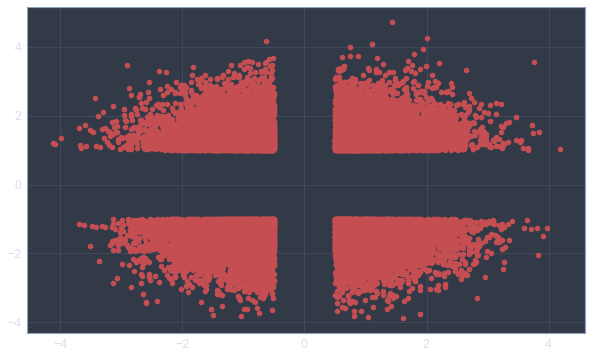

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(res.T[0], res.T[1], 'ro');

# Working with Compressed Tables

In [65]:
filename = 'pytabcs.h5'
h5c = tb.open_file(filename, 'w')
filters = tb.Filters(complevel=5, complib='blosc')
tabc = h5c.create_table('/', 'ints_floats', sarray,title='Integers and Floats',
                        expectedrows=rows, filters=filters)
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'
iteratorc = tabc.where(query)
%time 
res = [(row['No3'], row['No4']) for row in iteratorc]
res = np.array(res)
res[:3]

Wall time: 999 µs


array([[-0.8346, -1.4368],
       [ 1.1509, -1.1205],
       [ 1.0379, -1.5203]])

# Working with Arrays

In [66]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

Wall time: 5 ms


In [67]:
h5

File(filename=pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(150000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(150000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(150000,)) 'integers and FLoats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [68]:
h5.close()

# Out-of-Memory Computations

In [69]:
filename = 'earray.h5'
h5 = tb.open_file(filename, 'w')
n= 500
ear = h5.create_earray('/', 'ear',atom=tb.Float64Atom(), shape=(0, n))
type(ear)

tables.earray.EArray

In [70]:
rand = np.random.standard_normal((n, n))
rand[:4, :4]

array([[-1.75087302,  0.16595435, -0.94686675, -0.72876337],
       [-1.13934255, -0.57904135,  0.26374998, -0.83574954],
       [ 1.41520382,  0.68130294, -0.53816127,  1.73568722],
       [-1.02736541, -1.42432232,  0.03991088,  0.28160139]])

In [71]:
%%time
for _ in range(750):
    ear.append(rand)
ear.flush()

Wall time: 13.7 s


In [72]:
ear

/ear (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [73]:
ear.size_on_disk

1500032000

## Mathematical Equations - Out of Memory

In [74]:
out = h5.create_earray('/', 'out',atom=tb.Float64Atom(),shape=(0, n))
out.size_on_disk

0

In [75]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
expr.set_output(out, append_mode=True)

In [76]:
%time 
expr.eval()

Wall time: 0 ns


/out (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [77]:
out.size_on_disk
out[0, :10]

array([-1.6282843 ,  0.90295589, -1.46169608, -1.14416647, -1.76735558,
        3.91999911,  2.65949571, -0.38864282, -1.74759783, -0.7874786 ])

In [78]:
%time
out_ = out.read()

Wall time: 0 ns


In [79]:
out_[0, :10]

array([-1.6282843 ,  0.90295589, -1.46169608, -1.14416647, -1.76735558,
        3.91999911,  2.65949571, -0.38864282, -1.74759783, -0.7874786 ])

# TsTables

In [80]:
no = 5000000
co = 3
interval = 1. / (12*30*24*60)
vol = 0.2

In [81]:
%%time
rn = np.random.standard_normal((no, co))
rn[0] = 0.0
paths = 100 * np.exp(np.cumsum(-0.5 * vol ** 2 * interval + vol * np.sqrt(interval) * rn, axis=0))
paths[0] = 100

Wall time: 3.71 s


In [82]:
dr = pd.date_range('2019-1-1', periods=no, freq='1s')
dr[-6:]

DatetimeIndex(['2019-02-27 20:53:14', '2019-02-27 20:53:15',
               '2019-02-27 20:53:16', '2019-02-27 20:53:17',
               '2019-02-27 20:53:18', '2019-02-27 20:53:19'],
              dtype='datetime64[ns]', freq='S')

In [83]:
df = pd.DataFrame(paths, index=dr, columns=['ts1', 'ts2', 'ts3'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2019-01-01 00:00:00 to 2019-02-27 20:53:19
Freq: S
Data columns (total 3 columns):
ts1    float64
ts2    float64
ts3    float64
dtypes: float64(3)
memory usage: 152.6 MB


In [85]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,99.996171,100.010874,100.010922
2019-01-01 00:00:02,100.076081,100.022440,99.991001
2019-01-01 00:00:03,100.073927,100.054095,99.966148
2019-01-01 00:00:04,100.081685,100.087315,99.968560


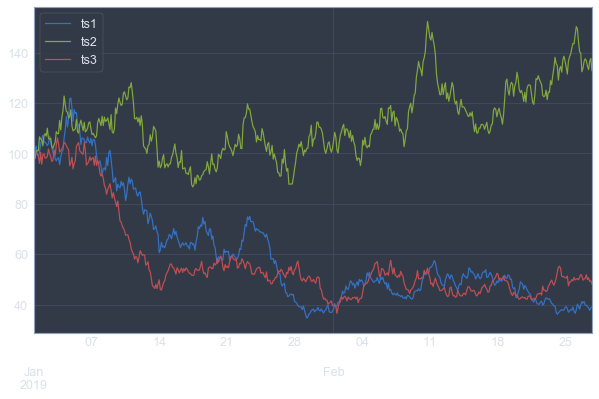

In [87]:
df[::10000].plot(figsize=(10,6))

### Data Storage

In [95]:
import tstables as tstbab
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0)
    ts1 = tb.Float64Col(pos =1)
    ts2 = tb.Float64Col(pos = 2)
    ts3 = tb.Float64Col(pos = 3)
    

In [102]:
h5.close()
h5 = tb.open_file('tstab.h5', 'w')
ts = h5.create_ts('/', 'ts', ts_desc)

## Data Retrieval 

In [103]:
read_start_dt = datetime.datetime(2019, 2, 1, 0, 0)
read_end_dt = datetime.datetime(2019, 2, 5, 23, 59)
%time 
rows = ts.read_range(read_start_dt, read_end_dt)
rows.info()

Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
ts1    0 non-null float64
ts2    0 non-null float64
ts3    0 non-null float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [104]:
h5.close()